In [1]:
import pandas as pd

In [2]:
cleaned_tweets = pd.read_csv('Cleaned_India_Covid_tweets.csv')

In [14]:
print(cleaned_tweets.shape)
cleaned_tweets.head()

(109728, 1)


,text
0,sacrificed everything protect corona patients ...
1,alert shall new norms laws movement stricter o...
2,seven promises need make extra care senior cit...
3,please move unnecessarily help prevent
4,dear leader nation modi ji suggestion need fol...


In [15]:
april2020_Tweet_Text = pd.read_csv('April2020_TweetText.csv')

In [16]:
! pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords = set(STOPWORDS)

In [19]:
a = cleaned_tweets.head(10)

In [20]:
tweets = a.text.to_list()

In [21]:
type(tweets)

list

In [22]:
tweets.append(f'my name is ashish and i am {21.01} year old')

In [23]:
text = ' '.join(tweets)

In [24]:
text.split(' ')

['sacrificed',
 'everything',
 'protect',
 'corona',
 'patients',
 'regardless',
 'lives',
 'alert',
 'shall',
 'new',
 'norms',
 'laws',
 'movement',
 'stricter',
 'offending',
 'seven',
 'promises',
 'need',
 'make',
 'extra',
 'care',
 'senior',
 'citizen',
 'family',
 'maintain',
 'social',
 'distancing',
 'follow',
 'directions',
 'ayush',
 'mantralay',
 'download',
 'arogya',
 'setu',
 'app',
 'feed',
 'needy',
 'fire',
 'employees',
 'appreciate',
 'corona',
 'warriors',
 'please',
 'move',
 'unnecessarily',
 'help',
 'prevent',
 'dear',
 'leader',
 'nation',
 'modi',
 'ji',
 'suggestion',
 'need',
 'follow',
 'tt',
 'principle',
 'testing',
 'tracing',
 'maximum',
 'tracing',
 'testing',
 'lead',
 'reduce',
 'number',
 'cases',
 'corona',
 'active',
 'curve',
 'start',
 'coming',
 'jai',
 'hind',
 'saptapadi',
 'pm',
 'tasks',
 'care',
 'elders',
 'sick',
 'social',
 'distance',
 'wear',
 'masks',
 'enhance',
 'immunity',
 'follow',
 'ministry',
 'directions',
 'download',
 'ar

In [14]:
b = []
for i in text.split():
    if i not in stopwords:
        b.append(i)

In [15]:
b.count(b[2])
count = {}
for i in range(len(b)):
    count[b[i]] = b.count(b[i])

In [16]:
count

{'sacrificed': 1,
 'everything': 1,
 'protect': 1,
 'corona': 8,
 'patients': 1,
 'regardless': 1,
 'lives': 1,
 'alert': 1,
 'new': 1,
 'norms': 1,
 'laws': 1,
 'movement': 1,
 'stricter': 1,
 'offending': 1,
 'seven': 2,
 'promises': 2,
 'need': 4,
 'make': 2,
 'extra': 2,
 'care': 5,
 'senior': 2,
 'citizen': 2,
 'family': 2,
 'maintain': 2,
 'social': 3,
 'distancing': 2,
 'follow': 8,
 'directions': 3,
 'ayush': 4,
 'mantralay': 2,
 'download': 5,
 'arogya': 5,
 'setu': 5,
 'app': 5,
 'feed': 2,
 'needy': 3,
 'fire': 2,
 'employees': 5,
 'appreciate': 2,
 'warriors': 5,
 'please': 1,
 'move': 1,
 'unnecessarily': 1,
 'help': 4,
 'prevent': 1,
 'dear': 1,
 'leader': 1,
 'nation': 1,
 'modi': 1,
 'ji': 1,
 'suggestion': 1,
 'tt': 1,
 'principle': 1,
 'testing': 2,
 'tracing': 2,
 'maximum': 1,
 'lead': 1,
 'reduce': 1,
 'number': 1,
 'cases': 1,
 'active': 1,
 'curve': 1,
 'start': 1,
 'coming': 1,
 'jai': 1,
 'hind': 1,
 'saptapadi': 2,
 'pm': 2,
 'tasks': 1,
 'elders': 1,
 'sick':

In [17]:
cleaned_tweets.isna().sum()

text    195
dtype: int64

In [25]:
cleaned_tweets.dropna(inplace=True)

**afinn score**
** **

In [20]:
!pip install afinn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from afinn import Afinn

In [27]:
afinn = Afinn(language='en')


In [29]:
afinn.score('my name is ashish and i am very bad boy sometimes but normally i am good boy')

0.0

In [213]:
afinn.score('Bad day.')

-3.0

In [24]:
afinn.score('Good day.')

3.0

In [25]:
afinn.score('Horrible, bad day.')


-6.0

In [26]:
afinn.scores('alert shall new norms laws movement stricter offending')

[-1, -2]

In [27]:
afinn.scores('wow good see kids interest online studying pandemic situation possible kcr garu ktr garu initiatives kind gesture give tv need anna')

[4, 3, 1, 2]

In [28]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
#afinn_wl_df.sample(10, random_state = seed)


In [30]:
cleaned_tweets['afinn score'] = cleaned_tweets['text'].apply(afinn.score)

**word count**
** **

In [31]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [45]:
cleaned_tweets['word_count'] = cleaned_tweets['text'].apply(word_count)

**nltk sentimnet**
** **

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()


In [31]:
def sentiment_score_nltk(text):
    return sent.polarity_scores(text)['compound']

In [32]:
sentiment_score_nltk('my name is ashish and i am very bad boy sometimes but normally i ma good boy')

0.3514

In [44]:
cleaned_tweets['sentiment'] = cleaned_tweets['text'].apply(sentiment_score_nltk)

** **
** **

In [39]:
sentiment_score_nltk('my name is ashish and i am very bad boy sometimes but normally i ma good boy')

0.3514

In [29]:
afinn.score('my name is ashish and i am very bad boy sometimes but normally i am good boy')

0.0

** **
** **

In [33]:
from transformers import pipeline

In [34]:
sent_transformer = pipeline("sentiment-analysis")

In [50]:
sent_transformer('bad boy')[0]['label']

'NEGATIVE'

In [39]:
sentiment_score_nltk('my name is ashish and i am very bad boy sometimes but normally i ma good boy')

0.3514

In [29]:
afinn.score('my name is ashish and i am very bad boy sometimes but normally i am good boy')

0.0

In [35]:
sent_transformer('my name is ashish and i am very bad boy sometimes but normally i ma good boy')[0]['score']

0.8737391233444214

In [54]:
def sentiment_trans_pipeline(text):
    return sent_transformer(text)[0]['label']  #sent_transformer(text)[0]['score'],

In [55]:
sentiment_transformer_label = cleaned_tweets['text'].apply(sentiment_trans_pipeline)

In [59]:
sentiment_transformer_label_num = sentiment_transformer_label.map({'NEGATIVE' : -1,'POSITIVE' : 1})

** **

In [57]:
cleaned_tweets.head()

,text,afinn score,sentiment,word_count,sentiment_transformer
0,sacrificed everything protect corona patients ...,1.0,0.3818,7,0.991190
1,alert shall new norms laws movement stricter o...,-3.0,-0.2732,8,0.921373
2,seven promises need make extra care senior cit...,1.0,0.5719,27,0.973535
3,please move unnecessarily help prevent,2.0,0.6249,5,0.988771
4,dear leader nation modi ji suggestion need fol...,3.0,0.6808,26,0.994520


** **
**saving data**

In [58]:
cleaned_tweets.to_csv('sentiments.csv',index=None)

** **
** **

In [47]:
import matplotlib.pyplot as plt


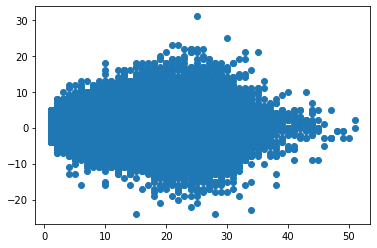

In [48]:
plt.scatter(cleaned_tweets['word_count'],cleaned_tweets['afinn score'])

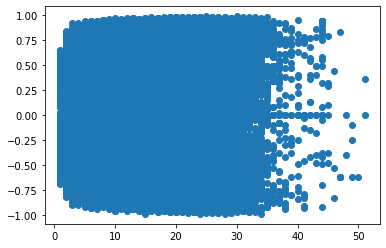

In [49]:
plt.scatter(cleaned_tweets['word_count'],cleaned_tweets['sentiment'])

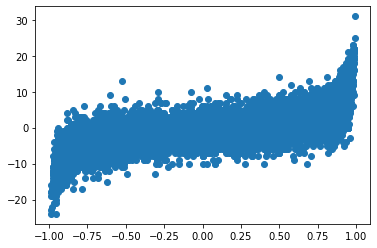

In [50]:
plt.scatter(cleaned_tweets['sentiment'],cleaned_tweets['afinn score'])

In [51]:
cleaned_tweets[(cleaned_tweets['sentiment'] <0 ) & (cleaned_tweets['afinn score'] > 0)]

,text,afinn score,sentiment,word_count
75,pm narendra modi ji announced extend lockdown ...,1.0,-0.0516,20
149,fight corona many mothers sisters state helpin...,1.0,-0.1027,10
160,corona virus made us sit unemployed home messa...,2.0,-0.5096,25
170,fight corona many mothers sisters state helpin...,1.0,-0.1027,10
197,true sir first time watch finally understood f...,2.0,-0.2023,25
...,...,...,...,...
109353,action till even concern raised new era airtel...,1.0,-0.3182,13
109374,infact pr lucrative job may demanding money pr...,1.0,-0.4215,16
109394,pendamics corona viruses going besides anythin...,1.0,-0.0516,16
109502,spread chinese virus whole world terrorism hel...,2.0,-0.4404,9


In [52]:
cleaned_tweets[(cleaned_tweets['sentiment'] > 0 ) & (cleaned_tweets['afinn score'] < 0)]

,text,afinn score,sentiment,word_count
51,united mission fighting corona soldiers govern...,-1.0,0.3400,8
70,day distributed tiffins daily wagers homeless ...,-2.0,0.3182,16
77,surya ji real true fighters india equally deli...,-2.0,0.1027,22
101,myteam giving best past days period without br...,-2.0,0.2960,25
114,tablighi attended nizamuddin congregation appr...,-1.0,0.3400,24
...,...,...,...,...
109644,pnr rkhnyw indigo cancelled flight due lockdow...,-1.0,0.1531,12
109648,something serious wrong meghalaya govt simply ...,-1.0,0.0591,16
109654,sir many deputed teacher also going appear ed ...,-2.0,0.0258,27
109679,dont try master asia get bloody nose people re...,-3.0,0.2392,13


In [53]:
cleaned_tweets[(cleaned_tweets['sentiment'] != 0 ) & (cleaned_tweets['afinn score'] == 0)]

,text,afinn score,sentiment,word_count
5,saptapadi pm tasks care elders sick social dis...,0.0,0.2023,31
39,plans provide urgent medical attention non cor...,0.0,0.2263,16
99,first corona death moradabad new positive,0.0,-0.0772,6
119,madam many states feeling financial crunch owi...,0.0,0.4767,30
129,industry sure reel traces left behind corona t...,0.0,0.3182,9
...,...,...,...,...
109667,govt shall concentrate infra projects benefit ...,0.0,0.0516,28
109670,morning constructive work involves making blue...,0.0,0.7506,15
109672,need weapons chinese virus,0.0,-0.4404,4
109710,declare benefits msme bank officials respondin...,0.0,-0.2263,20


In [54]:
cleaned_tweets[cleaned_tweets['sentiment'] > 0].shape,cleaned_tweets[cleaned_tweets['afinn score'] > 0].shape

((57864, 4), (48168, 4))

### modeling

In [9]:
!pip install gensim

  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


**import libraries**

In [11]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

In [37]:
tweets = pd.read_csv('sentiments.csv')

In [38]:
print(tweets.shape)
tweets.head()

(109533, 5)


,text,afinn score,sentiment,word_count,sentiment_transformer
0,sacrificed everything protect corona patients ...,1.0,0.3818,7,0.991190
1,alert shall new norms laws movement stricter o...,-3.0,-0.2732,8,0.921373
2,seven promises need make extra care senior cit...,1.0,0.5719,27,0.973535
3,please move unnecessarily help prevent,2.0,0.6249,5,0.988771
4,dear leader nation modi ji suggestion need fol...,3.0,0.6808,26,0.994520


In [40]:
tweets.describe(percentiles=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.80,0.90,1])

,afinn score,sentiment,word_count,sentiment_transformer
count,109533.000000,109533.000000,109533.000000,109533.000000
mean,0.534661,0.149948,13.808688,0.946240
std,3.370314,0.480690,8.054568,0.098295
min,-24.000000,-0.989900,1.000000,0.500041
0%,-24.000000,-0.989900,1.000000,0.500041
10%,-3.000000,-0.566700,3.000000,0.823275
20%,-2.000000,-0.296000,6.000000,0.933427
30%,0.000000,0.000000,8.000000,0.965867
40%,0.000000,0.000000,11.000000,0.979926
50%,0.000000,0.102700,13.000000,0.987375


In [60]:
tweets['sentiment_tansformer_NP'] = sentiment_transformer_label_num

In [61]:
tweets.head()

,text,afinn score,sentiment,word_count,sentiment_transformer,sentiment_tansformer_NP
0,sacrificed everything protect corona patients ...,1.0,0.3818,7,0.991190,-1.0
1,alert shall new norms laws movement stricter o...,-3.0,-0.2732,8,0.921373,1.0
2,seven promises need make extra care senior cit...,1.0,0.5719,27,0.973535,-1.0
3,please move unnecessarily help prevent,2.0,0.6249,5,0.988771,-1.0
4,dear leader nation modi ji suggestion need fol...,3.0,0.6808,26,0.994520,-1.0


** **
**saving data**

In [62]:
tweets.to_csv('sentiments_tweets.csv',index=None)

** **
** **

In [63]:
tweets_sentiment = pd.read_csv('sentiments_tweets.csv')

In [64]:
tweets_sentiment.head()

,text,afinn score,sentiment,word_count,sentiment_transformer,sentiment_tansformer_NP
0,sacrificed everything protect corona patients ...,1.0,0.3818,7,0.991190,-1.0
1,alert shall new norms laws movement stricter o...,-3.0,-0.2732,8,0.921373,1.0
2,seven promises need make extra care senior cit...,1.0,0.5719,27,0.973535,-1.0
3,please move unnecessarily help prevent,2.0,0.6249,5,0.988771,-1.0
4,dear leader nation modi ji suggestion need fol...,3.0,0.6808,26,0.994520,-1.0


In [65]:
tweets_sentiment.shape

(109533, 6)

In [66]:
tweets_sentiment.isna().sum()

text                         0
afinn score                  0
sentiment                    0
word_count                   0
sentiment_transformer        0
sentiment_tansformer_NP    195
dtype: int64

In [214]:
tweets_sentiment.dropna(inplace=True)

In [215]:
tweets_sentiment['transformer_score'] = tweets_sentiment.sentiment_transformer.mul(tweets_sentiment['sentiment_tansformer_NP'])

**textblob**
** **

In [220]:
from textblob import TextBlob

In [226]:
def sentiment_textblob(text):
    return TextBlob(text).sentiment.polarity

In [227]:
tweets_sentiment['sentiment_textblob'] = tweets_sentiment['text'].apply(sentiment_textblob)

** **
**saving data**

In [216]:
tweets_sentiment.to_csv('sentiments_tweets.csv',index=None)

** **

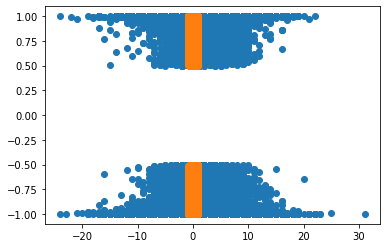

In [78]:
plt.scatter(tweets_sentiment['afinn score'],tweets_sentiment['transformer_score'])
plt.scatter(tweets_sentiment['sentiment'],tweets_sentiment['transformer_score'])

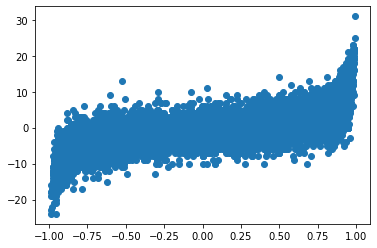

In [218]:
plt.scatter(tweets_sentiment['sentiment'],tweets_sentiment['afinn score'])


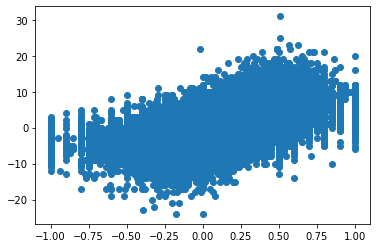

In [232]:
plt.scatter(tweets_sentiment['sentiment_textblob'],tweets_sentiment['afinn score'])


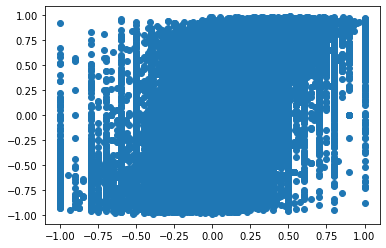

In [233]:
plt.scatter(tweets_sentiment['sentiment_textblob'],tweets_sentiment['sentiment'])

In [167]:
sentiment_score_nltk('ashish is good but sometimes he is bad'),sent_transformer('ashish is good but sometimes he is bad'),afinn.score('ashish is good but sometimes he is bad'),TextBlob('ashish is good but, sometimes he is bad').sentiment

(-0.5859,
 [{'label': 'NEGATIVE', 'score': 0.9391202926635742}],
 0.0,
 Sentiment(polarity=5.551115123125783e-17, subjectivity=0.6333333333333333))

In [166]:
sentiment_score_nltk('ashish is bad but sometimes he is good'),sent_transformer('ashish is bad but sometimes he is good'),afinn.score('ashish is bad but sometimes he is good'),TextBlob('ashish is bad but, sometimes he is good').sentiment

(0.3818,
 [{'label': 'POSITIVE', 'score': 0.9953548908233643}],
 0.0,
 Sentiment(polarity=5.551115123125783e-17, subjectivity=0.6333333333333333))

In [168]:
sentiment_score_nltk('ashish is bad but sometimes he is very good'),sent_transformer('ashish is bad but sometimes he is very good'),afinn.score('ashish is bad but sometimes he is very good'),TextBlob('ashish is bad but, sometimes he is very good').sentiment

(0.4659,
 [{'label': 'POSITIVE', 'score': 0.9984440803527832}],
 0.0,
 Sentiment(polarity=0.10500000000000004, subjectivity=0.7233333333333334))

In [176]:
sent.polarity_scores([['ashish is very bad'],[' sometimes he is good']]),
sent_transformer(['ashish is very bad',' sometimes he is good']),
afinn.score(['ashish is very bad',' sometimes he is good']),
TextBlob(['ashish is very bad',' sometimes he is good']).sentiment

AttributeError: 'list' object has no attribute 'encode'

In [196]:
text = 'in the mall clothes are good but they are expensive'
for i in text.split(' but '):
    print(f'nltk ---------------------- {sent.polarity_scores(i)}')
#    print(f'transformer --------------- {sent_transformer(i)}')
#    print(f'afinn --------------------- {afinn.score(i)}')
    print(f'textblob ------------------ {TextBlob(i).sentiment}')
    print()

print(f'nltk ---------------------- {sent.polarity_scores(text)}')
print(f'textblob ------------------ {TextBlob(text).sentiment}')


nltk ---------------------- {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
textblob ------------------ Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

nltk ---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
textblob ------------------ Sentiment(polarity=-0.5, subjectivity=0.7)

nltk ---------------------- {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.2382}
textblob ------------------ Sentiment(polarity=0.09999999999999998, subjectivity=0.65)


In [225]:
text = 'No one dared to contradict him, so he brought in anyone he knew.'
# for i in text.split(' but '):
#     print(f'nltk ---------------------- {sent.polarity_scores(i)}')
#     print(f'transformer --------------- {sent_transformer(i)}')
#     print(f'afinn --------------------- {afinn.score(i)}')
#     print(f'textblob ------------------ {TextBlob(i).sentiment}')
#     print()

print(f'transformer --------------- {sent_transformer(i)}')
print(f'afinn --------------------- {afinn.score(text)}')
print(f'nltk ---------------------- {sent.polarity_scores(text)}')
print(f'textblob ------------------ {TextBlob(text).sentiment.polarity}')

transformer --------------- [{'label': 'NEGATIVE', 'score': 0.978150486946106}]
afinn --------------------- -1.0
nltk ---------------------- {'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.5423}
textblob ------------------ 0.0


In [192]:
5.551115123125783*(10^(-17))

-149.88010832439613